In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import norm

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
# Load the data
df_data = pd.read_csv("data/data.csv")
df_data_genre = pd.read_csv("data/data_by_genres.csv")
df_data_w_genre = pd.read_csv("data/data_w_genres.csv")
df_data_artist = pd.read_csv("data/data_by_artist.csv")
df_data_year = pd.read_csv("data/data_by_year.csv")

In [4]:
df_data_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [5]:
### Question: are songs louder today?

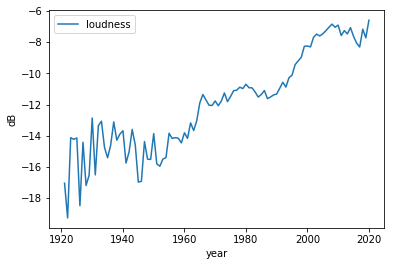

In [6]:
df_loudness = df_data_year[["year", "loudness"]].set_index("year")
df_loudness.plot()
plt.ylabel("dB")
plt.show()

In [7]:
# It is pretty save to say that music is quite a lot louder today. Another question somewhat on the topic would be: "Are songs also more explicit today?"

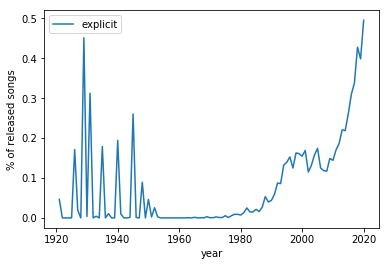

In [8]:
# First, summarize all explicit songs per year
df_explicit = df_data[["year", "explicit"]].groupby("year").sum()
songs_per_year = df_data[["year", "explicit"]].groupby("year").count()

# Normalize to % of released songs
df_explicit.explicit = df_explicit.explicit / songs_per_year.explicit;

# Plot
df_explicit.plot()
plt.ylabel("% of released songs")
plt.show()

In [9]:
# We now now that music is getting louder and dirtier. Sweet.

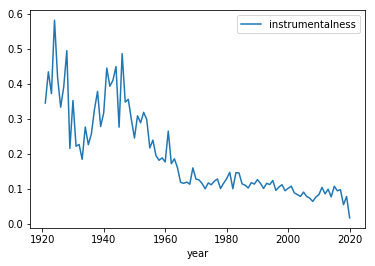

In [10]:
# Question: With classical music and jazz not being as popular today as before, is the instrumentalness lower now?
df_instrumental = df_data_year[["year", "instrumentalness"]].set_index("year")
df_instrumental.plot()
plt.show()

In [11]:
# Again, very convincing results. Even if genres as Electronic Dance Music has become very popular, most songs have vocals today.
# Note the spike around the 1940's. Were there more instrumental music surrounding the second wold war perhaps?

In [12]:
# With that being said, are songs more "dancable today"?

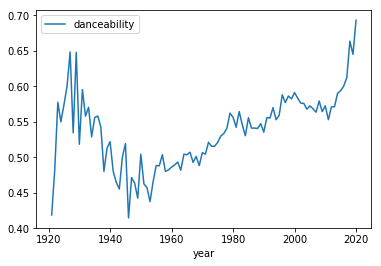

In [13]:
df_dance = df_data_year[["year", "danceability"]].set_index("year")
df_dance.plot()
plt.show()

In [14]:
# We can see a very negative trend around the second wold war in danceability, which is quite interesting. From then it's been rising steadiliy.abs
# However, after what seems to be the peak of the euro-dance trend om the 90's, danceability hade a slight negativ trend in the early 00's.

In [15]:
# What about duration? Are songs longer today?

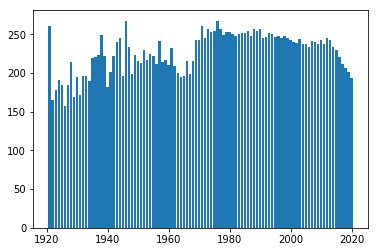

In [16]:
# Let's convert duration to seconds
df_duration = df_data_year[["year", "duration_ms"]].set_index("year")
df_duration.duration_ms = df_duration.duration_ms / 1000.0

# Plot time series
plt.bar(df_duration.index, df_duration.duration_ms)
plt.show()

In [17]:
# The duration of song seems to be on a downgoing trend which is very interesting. Song length has been very stable from the 70's until the last few years.

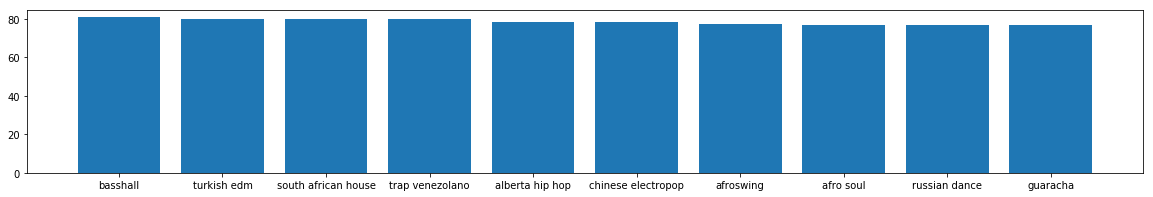

In [18]:
# Moving onto genres. Which 10 genres are the most popular?
df_genre_pop = df_data_genre[["genres", "popularity"]]

df_genre_pop.sort_values(by="popularity", ascending=False, inplace=True)
df_genre_pop = df_genre_pop.reset_index()[0:10]

plt.figure(figsize=(20, 3))
plt.bar(df_genre_pop.genres, df_genre_pop.popularity)
plt.show()

In [19]:
# I don't know about you, but turkish edm is not something I tend to blast in my headphones on my way to work. Strange finding.

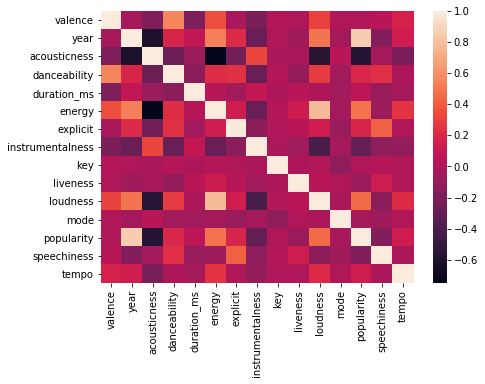

In [20]:
# This awakes the questions: what makes a song popular? Let's find out.

df_pop_heat = df_data.drop(columns=["artists", "id", "name", "release_date"])
correlations = df_pop_heat.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(correlations)

In [21]:
# Popularity seems to be highly correlated with year. Since the column is defined as "the popularity of the song lately in the US", this is not a schocker. But we also see that energy and loudness is important. And danceability seems to play in a bit. Another strong result is that acoustic and instrumental songs are not very popular. Summary: If you want a hit song, make sure it is loudly mixed, is dancable and is not made on campfire guitar. And make sure to sing.

<BarContainer object of 10 artists>

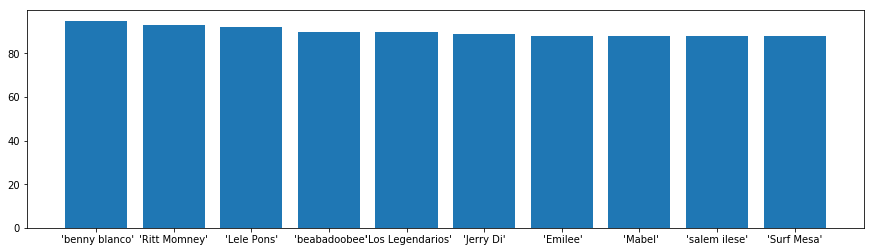

In [22]:
# Let's also have a look at the most popular and artists lately.

# First we want to split the artists lists into single rows
df_pop_artists = df_data
df_pop_artists["artists"] = df_pop_artists["artists"].str.strip("[]").str.split(",")
df_pop_artists = df_pop_artists.explode("artists")

# Now group by artists and get the mean popularity of each
df_pop_artists = df_pop_artists.groupby("artists").mean()
df_pop_artists = df_pop_artists[["popularity"]].sort_values(by="popularity", ascending=False)

# Plot
plt.figure(figsize=(15,4))
df_pop_artists_to_plot = df_pop_artists.head(10)
plt.bar(df_pop_artists_to_plot.index, df_pop_artists_to_plot.popularity)

In [23]:
# I've got to say, I didn't recognize a lot these. But when I looked but a few songs from them they were very familiar. Mostly TikTok-songs :))

In [24]:
df_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Ber...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


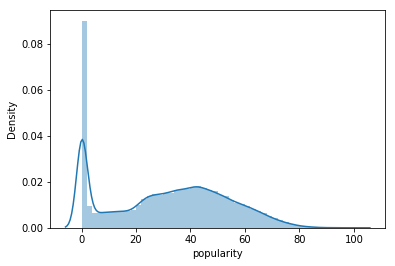

In [25]:
# Let's try to predict popularity of a song

# First look how popularity is distributed
sns.distplot(df_data["popularity"])

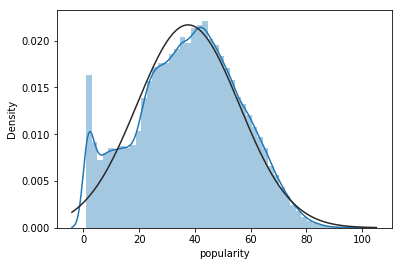

In [83]:
# A LOT of songs have 0 popularity. Let's delete these
predData = df_data[df_data.popularity != 0]
sns.distplot(predData.popularity, fit=norm)

In [84]:
# Look better. Still a lot low values, but let's move on

# These columns are either string values or do not contain relevant info. Release_date and year are identical mostly.
y = predData.popularity
X = predData.drop(columns=["artists", "id", "name", "release_date", "popularity"])

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's try a couple of different regressors

# RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

pred_pop = clf.predict(X_test)
MAE = mean_absolute_error(y_test , pred_pop)
print('Random forest MAE =', MAE)

# SGDRegressor
clf = SGDRegressor()
clf.fit(X_train, y_train)

pred_pop = clf.predict(X_test)
MAE = mean_absolute_error(y_test , pred_pop)
print('SGD validation MAE =', MAE)

# XGBRegressor
clf = XGBRegressor()
clf.fit(X_train, y_train)

pred_pop = clf.predict(X_test)
MAE = mean_absolute_error(y_test , pred_pop)
print('XGB validation MAE =', MAE)

Random forest MAE = 7.931439875942205
SGD validation MAE = 8.125421673323812
XGB validation MAE = 7.5490738485779945


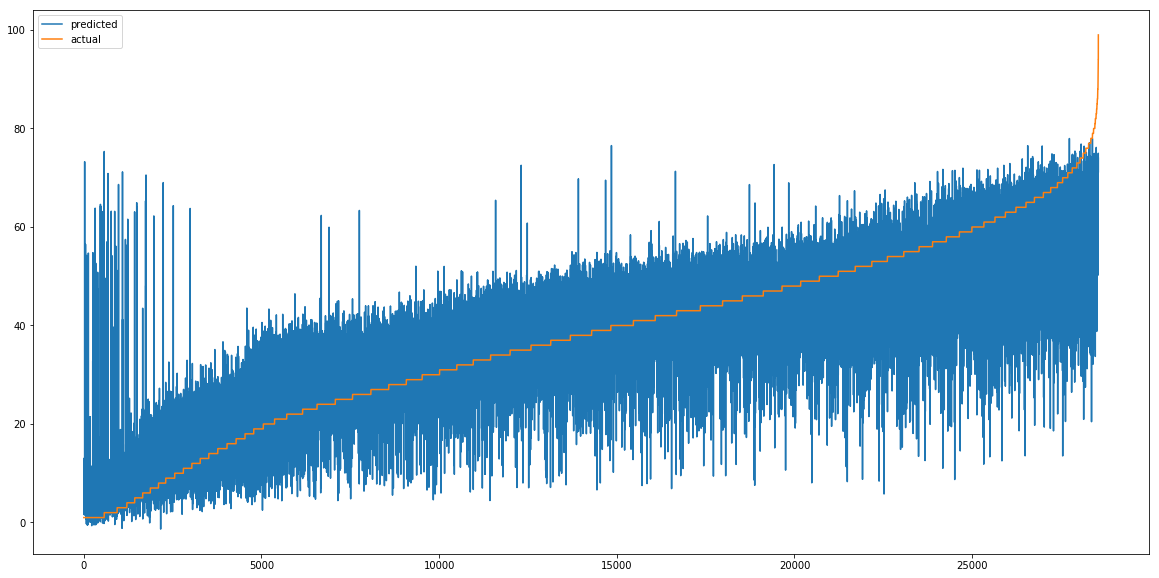

In [85]:
# Out of these three, XGB Regressor performed the best. To get a better feeling of how good this is, let's plot the predicts against the actual results.

xg_df = pd.DataFrame({"predicted":pred_pop, "actual":y_test})
xg_df = xg_df.sort_values(by="actual").reset_index(drop=True)

xg_df.plot(figsize=(20,10))
plt.show()

In [86]:
# We see that low values are over-estimated by a lot compared to mid-values (remember how we had a lot of low values in the data - that might have an impact here...). The model also fails to predict very large values. The amount of data for very popular songs are rather small which might be the reason here.

# Still, this model could give some direction on how popular a song would be, but not very close to perfect I'm afraid.